In [4]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from keras.datasets import cifar10
from keras import backend as K
from keras.utils import np_utils
from scipy import stats
from sklearn.model_selection import train_test_split


In [2]:
num_classes = 10

def load_cifar10_data(img_rows, img_cols, nb_train_samples=1000,nb_test_samples=200):

    # Load cifar10 training and validation sets
    (X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

    # Resize trainging images
    if K.image_dim_ordering() == 'th':
        X_train = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in X_train[:nb_train_samples,:,:,:]])
        X_test = np.array([cv2.resize(img.transpose(1,2,0), (img_rows,img_cols)).transpose(2,0,1) for img in X_test[:nb_test_samples,:,:,:]])
    else:
        X_train = np.array([cv2.resize(np.divide(img,255), (img_rows,img_cols)) for img in X_train[:nb_train_samples,:,:,:]])
        X_test = np.array([cv2.resize(np.divide(img,255), (img_rows,img_cols)) for img in X_test[:nb_test_samples,:,:,:]])

    # Transform targets to keras compatible format
    Y_train = np_utils.to_categorical(Y_train[:nb_train_samples], 10)
    Y_test = np_utils.to_categorical(Y_test[:nb_test_samples], 10)

    return X_train, Y_train, X_test, Y_test

In [33]:
img_cols,img_rows = 32,32

X_train, Y_train, X_test, Y_test = load_cifar10_data(img_rows, img_cols, nb_train_samples=35000,nb_test_samples=10000)

X_test, X_valid, Y_test, Y_valid = train_test_split(X_test, Y_test, test_size=0.2)

Y_train,Y_valid,Y_test = np.array([np.argmax(i) for i in Y_train]).astype(int),np.array([np.argmax(i) for i in Y_valid]),np.array([np.argmax(i) for i in Y_test]).astype(int)


df = pd.DataFrame()
df['Y_test'] = pd.Series(Y_test.astype(int))
df['Y_valid'] = pd.Series(Y_valid.astype(int))

(2000,)


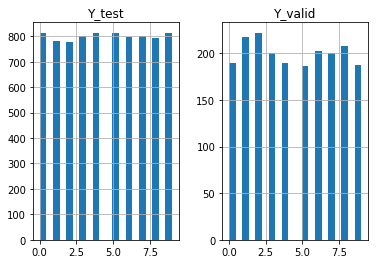

In [34]:
print(Y_valid.shape)
hist = df.hist(bins=20,grid=True)